In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print (torch.__version__)
print (torchvision.__version__)

2.1.0.dev20230707
0.16.0.dev20230707


#### Getting a dataset fashion mnist


In [3]:
train_data = datasets.FashionMNIST(root='data', train=True, download=True,
                                   transform=torchvision.transforms.ToTensor(), #how do we want to transform data
                                   target_transform=None #how do we want to transform labels/target
                                  )

test_data = datasets.FashionMNIST(root='data',
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None
                                 )

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
#making dict with labels
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
#check the shape of our image
image.shape #[colour, height, width]

torch.Size([1, 28, 28])

In [9]:
label

9

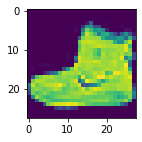

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(image[0,:,:])

Text(0.5, 1.0, 'Ankle boot')

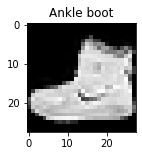

In [11]:
# WITH SQUEEZE
plt.figure(figsize=(2,2))
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[9])

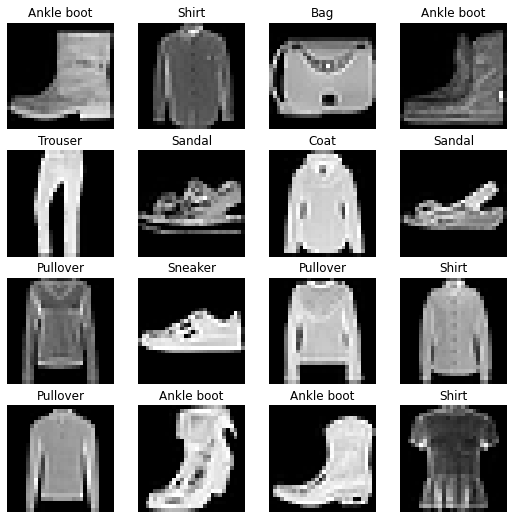

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range (1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)
    

## Maiking DataLoader

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())


DataLoader transforms our dataset into python data iterable


We want to transform our dataset into batches (or mini-batches)

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, shuffle=True,
                             batch_size = BATCH_SIZE)

test_dataloader = DataLoader(dataset=test_data,
                            shuffle=False,
                            batch_size = BATCH_SIZE)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x149b571c0>,
 <torch.utils.data.dataloader.DataLoader at 0x149b40a00>)

In [15]:
print (f'Number of butches in train: {len(train_dataloader)}')
print (f'Number of butches in test: {len(test_dataloader)}')

Number of butches in train: 1875
Number of butches in test: 313


In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Shirt')

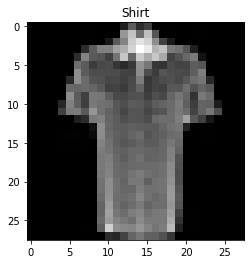

In [17]:
#Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])

## Makiing Baseline model

In [18]:
#Making Model with linear layers

flatten_model = nn.Flatten()

#Get a single sampple
x = train_features_batch[0]
# Flatten a sample

print (x.shape, flatten_model(x).shape)

torch.Size([1, 28, 28]) torch.Size([1, 784])


In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, inpit_shape: int,
                hidden_untits: int,
                output_shape: list):
        super().__init__()
        
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=inpit_shape, out_features=hidden_untits),
                                        nn.Linear(in_features=hidden_untits, out_features=output_shape)
                                        )
        
    def forward(self, x):
        return self.layer_stack(x)
        
        

In [20]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(inpit_shape=784, #28*28
                             hidden_untits=10,
                             output_shape=len(class_names)
                             )

model_0.to('cpu')



FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Setup loss fucntion and optimizer

In [22]:
from helper_functions import accuracy_fn 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [23]:
# Making a function to time our experiments
from timeit import default_timer as timer

def print_train_time(start:float,
                    end:float,
                    device: torch.device = None):
    '''Print diif between start and finish'''
    
    total_time = end - start
    print (f'Train time on {device}: {total_time:.3f} second')
    return total_time

In [24]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 second


4.399999988891068e-05

## Cratimg training loop and trainig on batches

1 Loop throught epochs

2 Loop throught batches

3 Calculate train loss per batch 

4 Loop throug testing loop and calculate test loss per batch

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer() 

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)
    
    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()
    
    # Print out what's happening
    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
  
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode(): 
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------


Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 6.168 second


## MAKE PREDICTION AND get Model_0 results

In [26]:
device='cpu'

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device
              ):
    """Returns a dict with model results predicted on dataloader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            #Making code, device agnostic
            X, y = X.to(device), y.to(device)
            #Make  preds
            y_pred = model(X)
            
            #Accumulate loss and acc values per batch
            loss += loss_fn(y_pred, y)
            
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, #works only if model created as class
           "model_loss": loss.item(),
            "model_acc":acc
           }


In [27]:
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                             device=device)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [28]:
# Device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [29]:
#device = 'mps'
device

'cpu'

## Adding non linearity

In [30]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
    )
    
    def forward(self, x:torch.tensor):
        return self.layer_stack(x)
        

In [31]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [32]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

###  Functionizing trainig and test loop

Training loop - train_step()

Testing loop - test_step()

In [33]:
 def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
        
        train_loss, train_acc = 0, 0
        
        model.train()
        
        for batch, (X, y) in enumerate(data_loader):
            X, y = X.to(device), y.to(device)
            
            #Outouts raw logits from model
            y_pred = model(X)

            # 2. Calculate loss an acc (per batch)
            loss = loss_fn(y_pred, y)            
            train_loss += loss # accumulate train loss
            
            train_acc += accuracy_fn(y_true=y,
                                     y_pred=y_pred.argmax(dim=1)
                                    )
                        

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step (update the model's parameters once *per batch*)
            optimizer.step()
            
            # Print out what's happening
            #if batch % 400 == 0:
            #print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
            
        # Divide total train loss by length of train dataloader
        train_loss /= len(data_loader)
        train_acc /= len(data_loader)
        print (f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%  ')

In [34]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    test_loss, test_acc = 0, 0
    
    model.eval()
    
    #Turn on infererence mode
    
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            test_pred = model(X)
            
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # from logits -> prediction labels
        
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        print (f'Test_loss: {test_loss:.5f} | Test_acc: {test_acc:.2f}%')
            
    

In [35]:
torch.manual_seed(43)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()


#set_epochs
epochs = 3

#creating optimization and testing loops

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device
             )
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 1.04998 | Train acc: 62.45%  
Test_loss: 0.98247 | Test_acc: 64.17%
Epoch: 1
Train loss: 0.90972 | Train acc: 66.21%  
Test_loss: 0.90520 | Test_acc: 66.11%
Epoch: 2
Train loss: 0.87536 | Train acc: 67.40%  
Test_loss: 0.91604 | Test_acc: 66.21%
Train time on cpu: 5.899 second


In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [37]:
#TRain time on CPU
total_train_time_model_0

6.168103416999884

In [38]:
#Train time on GPU
total_train_time_model_1

5.899410541999941

In [39]:
# Get model1 results dict

model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9160398840904236,
 'model_acc': 66.21405750798722}

In [40]:
model_0_results 

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## CNN COnvulution NNs

 Best site for convilution explain 

# https://poloclub.github.io/cnn-explainer/

In [41]:
class FashionMNISTModelV2(nn.Module):
    '''Model that replcates TinyVGG architecture from CNN explainer website'''
    
    def __init__(self, inpute_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=inpute_shape,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1),
                                          nn.ReLU(),
                                          nn.Conv2d(in_channels=hidden_units,
                                                    out_channels=hidden_units,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1),
                                          nn.ReLU(),
                                          nn.MaxPool2d(kernel_size=2)
                                         )
        
                                    
            
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,   #From test forward pass | oroginaly was = hidden_units*10
                     out_features=output_shape)
        )
        
    def forward(self, x):
        x = self.conv_block_1(x)
        #print (f'Output shape of conv. Block1 {x.shape}')
        x = self.conv_block_2(x)
        #print (f'Output shape of conv. Block2 {x.shape}')
        x = self.classifier(x)
        #print (f'Output shape of classifier {x.shape}')
        return (x)

In [42]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(inpute_shape=1,   # if we had colour images then input_shape should be set to 3
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

#### Stepping through nn.Conv2d() 

In [43]:
torch.manual_seed(42)
# create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print (f'Image batch shape {images.shape}')
print (f'Single image shape {test_image.shape}')
print (f'Test image {test_image}' )


Image batch shape torch.Size([32, 3, 64, 64])
Single image shape torch.Size([3, 64, 64])
Test image tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

In [44]:
# Create single conv2d layers
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=(3,3),
                      stride=1,
                      padding=0)

#Pass the data throught conv layer 
con_output = conv_layer(test_image)
con_output.shape

torch.Size([10, 62, 62])

In [45]:
# Stepping through MaxPool2D
max_pool = nn.MaxPool2d(kernel_size=2)



In [46]:
print (f'Test image original shape {test_image.shape}')
print (f'Test image with unsqueezed dimension  {test_image.unsqueeze(0).shape}')

Test image original shape torch.Size([3, 64, 64])
Test image with unsqueezed dimension  torch.Size([1, 3, 64, 64])


In [47]:
test_image_thriught_Max_Pool = max_pool(con_output)
test_image_thriught_Max_Pool.shape

torch.Size([10, 31, 31])

#### Checking my convolution model with dummy tensors

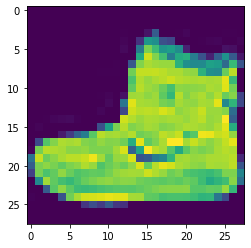

In [48]:
plt.imshow(image.squeeze())

In [49]:
#with real image 
answer = model_2(image.unsqueeze(0).to(device))

In [50]:
answer

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

## Setup loss finction and optimizer

In [51]:
# Setup loss and evaluation metrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [52]:
# Training and testing model_2

torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()


epochs = 3

for epoch in tqdm(range(epochs)):
    print (f'Epoch: {epoch}')
    train_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
    

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.59355 | Train acc: 78.48%  
Test_loss: 0.40828 | Test_acc: 85.40%
Epoch: 1
Train loss: 0.36563 | Train acc: 86.82%  
Test_loss: 0.36302 | Test_acc: 86.39%
Epoch: 2
Train loss: 0.32580 | Train acc: 88.16%  
Test_loss: 0.33149 | Test_acc: 87.95%
Train time on cpu: 84.783 second


In [53]:
# GET RESULTS
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.331485778093338,
 'model_acc': 87.94928115015975}

In [54]:
#Comapring to results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [55]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #Prepare sample (ADD A BATCH DIMENSION) and send it to device
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            #Forward pass, model will output raw logits
            pred_logits = model(sample)
            
            #Get predicton probability (logits->prediction probs)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
            
            #Get preb_probs to CPU (matplotlib doesn't work with GPU)
            pred_probs.append(pred_prob.cpu())
            
#Stack pred_probs to turn list into a tensor 

    return torch.stack(pred_probs)
            
            
            
            

In [56]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [57]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [58]:
import random
random.seed(55)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    

test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

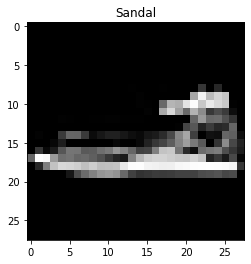

In [59]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [60]:
#Make predocions 
pred_probs = make_predictions(model=model_2,
                             data=test_samples)

#View first two prediction probabilities
pred_probs[:2]

tensor([[2.3579e-04, 1.8068e-05, 3.8990e-04, 1.1737e-04, 4.1512e-05, 9.7613e-01,
         1.1722e-04, 1.0296e-02, 7.3731e-03, 5.2827e-03],
        [3.6157e-05, 1.6275e-05, 3.3203e-04, 1.6578e-04, 5.8006e-06, 9.6270e-01,
         2.2892e-05, 3.3752e-02, 2.5596e-03, 4.0875e-04]])

In [61]:
#Now we need to convert predicioon probabilities to labels
# We will use argmax

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 5, 7, 9, 0, 9, 3, 0, 1])

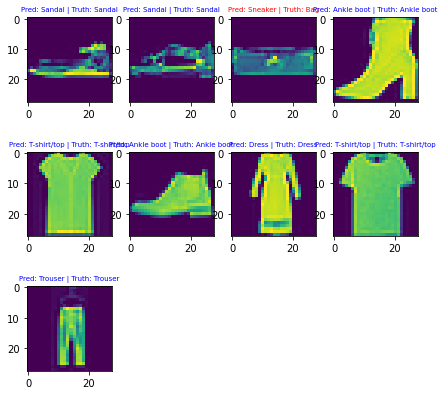

In [62]:
#plot_prediction

plt.figure(figsize=(7,7))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    #Create subplot
    plt.subplot(nrows,cols, i+1)
    
    plt.imshow(sample.squeeze())
    
    #Find predicion in text form
    pred_label = class_names[pred_classes[i]]
    
    #Get truth label
    truth_label = class_names[test_labels[i]]
    
    #Create a title for a plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'
    
    if pred_label == truth_label:
        plt.title(title_text, fontsize=7, c='b')
    else:
        plt.title(title_text, fontsize=7, c='r')

Making a confusion matrix

A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/ 

In [63]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making prediciotions: "):
        X, y = X.to(device), y.to(device)
        y_logits = model_2(X)
        y_pred = torch.softmax(y_logits.squeeze(), dim=1).argmax(dim=1)
        #Put predicions to CPU for matplotlib
        y_preds.append(y_pred.cpu())

#print (y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making prediciotions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [69]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [68]:
import torchmetrics
import mlxtend
mlxtend.__version__

'0.23.1'

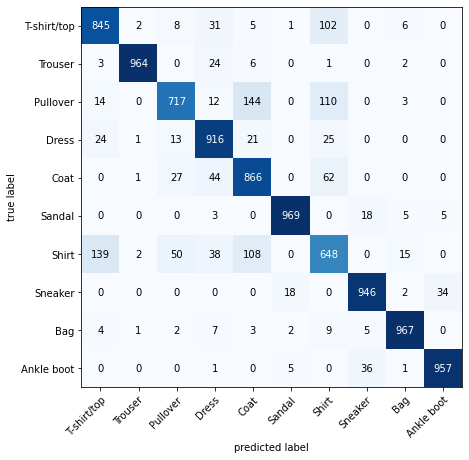

In [74]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#Setup confusion matrix instance and compare prediction and classes

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

#Plot conMatrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10,7))

Saving and loading best model 

In [76]:
from pathlib import Path

#Create directory
MODEL_PATH = Path('SS_models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#Create model save 
MODEL_NAME = "03_pytorch_cv_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#Saving a model state dict
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

In [77]:
#Loading new model
#Creating a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(inpute_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

#Load saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#Send model to target device

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Evaluate loaded model

In [78]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.331485778093338,
 'model_acc': 87.94928115015975}

In [91]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)
                                    
            

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.331485778093338,
 'model_acc': 87.94928115015975}